In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
# Carregar os dados tratados em um DataFrame
data = pd.read_csv('/content/drive/MyDrive/sentimento_revisto.csv')

# Dividir os dados em conjuntos de treinamento e teste
X = data['texto_tokenizado2']
y = data['sentimento_revisto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Criar o objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Ajustar e transformar os dados de treinamento
X_train_vectors = vectorizer.fit_transform(X_train)

# Transformar os dados de teste
X_test_vectors = vectorizer.transform(X_test)


In [5]:
# Criar o objeto RandomForestClassifier
rf_model = RandomForestClassifier()

# Treinar o modelo com os dados de treinamento
rf_model.fit(X_train_vectors, y_train)

RandomForestClassifier()

In [6]:
# Fazer previsões nos dados de teste
y_pred = rf_model.predict(X_test_vectors)

# Calcular as métricas de desempenho
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

          -1       0.62      0.67      0.64       342
           0       0.64      0.60      0.62       271
           1       0.77      0.76      0.77       521

    accuracy                           0.69      1134
   macro avg       0.68      0.67      0.68      1134
weighted avg       0.69      0.69      0.69      1134



In [7]:
# Definir a grade de valores para os hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

# Realizar a busca em grid nos dados de treinamento
grid_search.fit(X_train_vectors, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros: ", grid_search.best_params_)

# Fazer previsões com o modelo otimizado nos dados de teste
y_pred_optimized = grid_search.predict(X_test_vectors)

# Calcular as métricas de desempenho com o modelo otimizado
report_optimized = classification_report(y_test, y_pred_optimized)
print(report_optimized)

Melhores hiperparâmetros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

          -1       0.63      0.73      0.68       342
           0       0.67      0.60      0.63       271
           1       0.79      0.76      0.78       521

    accuracy                           0.71      1134
   macro avg       0.70      0.69      0.69      1134
weighted avg       0.71      0.71      0.71      1134



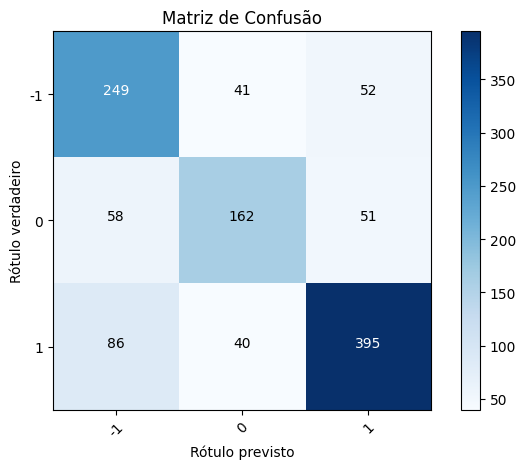

In [8]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred_optimized)

# Define as classes
classes = np.unique(np.concatenate((y_test, y_pred_optimized)))

# Plot da matriz de confusão
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Formata os valores dentro dos quadrados da matriz
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Rótulo verdadeiro')
plt.xlabel('Rótulo previsto')
plt.tight_layout()
plt.show()
